<a href="https://colab.research.google.com/github/Gnani0825/Gnaneshwar_INFO5731_Fall2024/blob/main/Pendyala_Gnaneshwar_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1 (10 Points)
**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import nltk
import re

In [3]:
from google.colab import files
uploaded=files.upload()

Saving consumer_compliants.csv to consumer_compliants.csv


In [4]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data and reduce rows
df = pd.read_csv('consumer_compliants.csv')
df = df[['Consumer complaint narrative', 'Product', 'Company']].rename(columns={'Consumer complaint narrative':'complaints'})
df = df.dropna(subset=['complaints']).sample(n=3000, random_state=42)  # Sample 3000 rows


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = text.lower()  # Lowercase text
    return ' '.join([word for word in text.split() if word not in stop_words])



In [6]:
df['cleaned_complaints'] = df['complaints'].apply(preprocess_text)


In [7]:
vectorizer = CountVectorizer(min_df=5, max_df=0.9)
doc_term_matrix = vectorizer.fit_transform(df['cleaned_complaints'])

In [8]:
corpus = [vectorizer.get_feature_names_out()[word] for word in doc_term_matrix.nonzero()[1]]
id2word = corpora.Dictionary([corpus])
corpus = [id2word.doc2bow(text.split()) for text in df['cleaned_complaints']]

In [9]:
def compute_coherence_values(corpus, dictionary, k, texts):
    lda_model = LdaModel(corpus=corpus, num_topics=k, id2word=dictionary, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

In [10]:
coherence_scores = {}
for k in range(2, 11):  # Testing from 2 to 10 topics
    coherence_score = compute_coherence_values(corpus, id2word, k, df['cleaned_complaints'].apply(str.split))
    coherence_scores[k] = coherence_score
    print(f'Number of Topics: {k}, Coherence Score: {coherence_score}')


Number of Topics: 2, Coherence Score: 0.3013559007713012


Number of Topics: 3, Coherence Score: 0.3247455922208647


Number of Topics: 4, Coherence Score: 0.32155375656152546


Number of Topics: 5, Coherence Score: 0.33519018680267265


Number of Topics: 6, Coherence Score: 0.3348166900814114


Number of Topics: 7, Coherence Score: 0.3275590844024609


Number of Topics: 8, Coherence Score: 0.3354585695529155


Number of Topics: 9, Coherence Score: 0.33321010845766447
Number of Topics: 10, Coherence Score: 0.3335403545560149


In [11]:
optimal_k = max(coherence_scores, key=coherence_scores.get)
print(f'\nOptimal number of topics: {optimal_k} with coherence score of {coherence_scores[optimal_k]}')



Optimal number of topics: 8 with coherence score of 0.3354585695529155


In [12]:
lda_model_optimal = LdaModel(corpus=corpus, num_topics=optimal_k, id2word=id2word, random_state=42)


In [13]:
topics = lda_model_optimal.show_topics(num_topics=optimal_k, formatted=False)
topics_summary = {f'Topic {i+1}': [word for word, _ in topic] for i, topic in topics}
print("\nTopics Summary:")
for topic, words in topics_summary.items():
    print(f'{topic}: {", ".join(words)}')


Topics Summary:
Topic 1: xx, xxxx, 00, account, credit, report, payment, company, received, debt
Topic 2: xxxx, xx, loan, account, 00, credit, debt, time, received, information
Topic 3: xxxx, account, card, xx, credit, 00, would, one, said, fraud
Topic 4: xxxx, xx, account, credit, 00, card, bank, debt, would, told
Topic 5: xxxx, mortgage, payment, 00, account, credit, days, payments, pay, xx
Topic 6: xxxx, xx, credit, payment, account, 00, payments, loan, would, bank
Topic 7: xxxx, xx, told, debt, account, would, call, payment, received, called
Topic 8: xxxx, xx, mortgage, loan, account, would, payment, credit, time, bank


## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [26]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import remove_stopwords


In [14]:
from google.colab import files
uploaded=files.upload()


Saving imdb_movie_dataset.csv to imdb_movie_dataset.csv


In [27]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import pandas as pd

# load data
df = pd.read_csv('imdb_movie_dataset.csv', usecols=['Rank', 'Description'])
df.head()
df = df.dropna(subset=['Description'])

In [28]:
def preprocess_text(text):
    text = remove_stopwords(text)  # Remove Gensim's stop words
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    text = text.lower()  # Convert to lowercase
    return text.split()  #

In [29]:
df['cleaned_description'] = df['Description'].apply(preprocess_text)


In [30]:
dictionary = corpora.Dictionary(df['cleaned_description'])
corpus = [dictionary.doc2bow(text) for text in df['cleaned_description']]


In [31]:
coherence_scores = {}
for num_topics in range(2, 11):  # Testing from 2 to 10 topics
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)
    coherencemodel = CoherenceModel(model=lda_model, texts=df['cleaned_description'], dictionary=dictionary, coherence='c_v')
    coherence_scores[num_topics] = coherencemodel.get_coherence()
    print(f'Number of Topics: {num_topics}, Coherence Score: {coherence_scores[num_topics]}')

Number of Topics: 2, Coherence Score: 0.17086300643845967
Number of Topics: 3, Coherence Score: 0.19809199471902597
Number of Topics: 4, Coherence Score: 0.21407694007203087
Number of Topics: 5, Coherence Score: 0.23070102331942297
Number of Topics: 6, Coherence Score: 0.2242241753618561
Number of Topics: 7, Coherence Score: 0.22630889082480138
Number of Topics: 8, Coherence Score: 0.2511107456487056
Number of Topics: 9, Coherence Score: 0.23981656724302536
Number of Topics: 10, Coherence Score: 0.25319137627439137


In [32]:
optimal_k = max(coherence_scores, key=coherence_scores.get)
print(f'\nOptimal number of topics: {optimal_k}')



Optimal number of topics: 10


In [33]:
final_lda_model = LdaModel(corpus, num_topics=optimal_k, id2word=dictionary, passes=10, random_state=42)

In [34]:
print("\nTopics Summary:")
topics = final_lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


Topics Summary:
(0, '0.020*"s" + 0.015*"a" + 0.008*"world" + 0.007*"the" + 0.005*"in" + 0.005*"new" + 0.004*"life" + 0.004*"team" + 0.004*"war" + 0.003*"man"')
(1, '0.011*"a" + 0.011*"s" + 0.010*"the" + 0.008*"world" + 0.006*"young" + 0.006*"new" + 0.006*"in" + 0.005*"when" + 0.004*"father" + 0.004*"woman"')
(2, '0.009*"s" + 0.008*"the" + 0.008*"a" + 0.007*"when" + 0.005*"new" + 0.005*"family" + 0.005*"home" + 0.004*"friends" + 0.004*"life" + 0.003*"story"')
(3, '0.007*"s" + 0.006*"in" + 0.006*"an" + 0.006*"the" + 0.006*"a" + 0.006*"new" + 0.005*"agent" + 0.004*"man" + 0.003*"story" + 0.003*"world"')
(4, '0.014*"a" + 0.010*"man" + 0.006*"s" + 0.006*"new" + 0.005*"the" + 0.005*"young" + 0.005*"life" + 0.005*"in" + 0.004*"story" + 0.003*"work"')
(5, '0.012*"s" + 0.007*"the" + 0.007*"a" + 0.006*"world" + 0.005*"life" + 0.005*"new" + 0.005*"young" + 0.004*"family" + 0.004*"help" + 0.004*"an"')
(6, '0.030*"a" + 0.021*"s" + 0.010*"young" + 0.008*"life" + 0.006*"man" + 0.005*"woman" + 0.005*

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [52]:
!pip install bertopic
!pip install nltk
!pip install pandas
!pip install gensim
!pip install umap-learn
!pip install scikit-learn




In [56]:
import pandas as pd
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [57]:
from google.colab import files
uploaded=files.upload()





Saving imdb_movie_dataset.csv to imdb_movie_dataset (1).csv


In [58]:
data = pd.read_csv('imdb_movie_dataset.csv')
text_column = 'Description'
def preprocess_text(texts):
    stop_words = set(stopwords.words('english'))
    processed_texts = []
    for text in texts:
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        processed_texts.append(tokens)
    return processed_texts
documents = preprocess_text(data[text_column].values.tolist())

# fit in the BERTopic model
topic_model = BERTopic()
topic_model.fit([" ".join(doc) for doc in documents])  # Join tokens to fit the model


In [66]:
def compute_coherence_bertopic(model, texts):
    topics = model.get_topics()
    topic_words = [[word for word, _ in topics[topic]] for topic in topics if topic != -1]
    dictionary = Dictionary(texts)
    coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()
topic_range = range(2, 11)
coherence_values = []

for k in topic_range:
    reduced_model = topic_model.reduce_topics([" ".join(doc) for doc in documents], nr_topics=k)
    coherence = compute_coherence_bertopic(reduced_model, [doc for doc in documents])  # Pass list of tokens
    coherence_values.append(coherence)
    print(f"Coherence Score for {k} topics: {coherence}")


Coherence Score for 2 topics: 0.32116322319978985
Coherence Score for 3 topics: 0.32116322319978985
Coherence Score for 4 topics: 0.32116322319978985
Coherence Score for 5 topics: 0.32116322319978985
Coherence Score for 6 topics: 0.32116322319978985
Coherence Score for 7 topics: 0.32116322319978985
Coherence Score for 8 topics: 0.32116322319978985
Coherence Score for 9 topics: 0.32116322319978985
Coherence Score for 10 topics: 0.32116322319978985


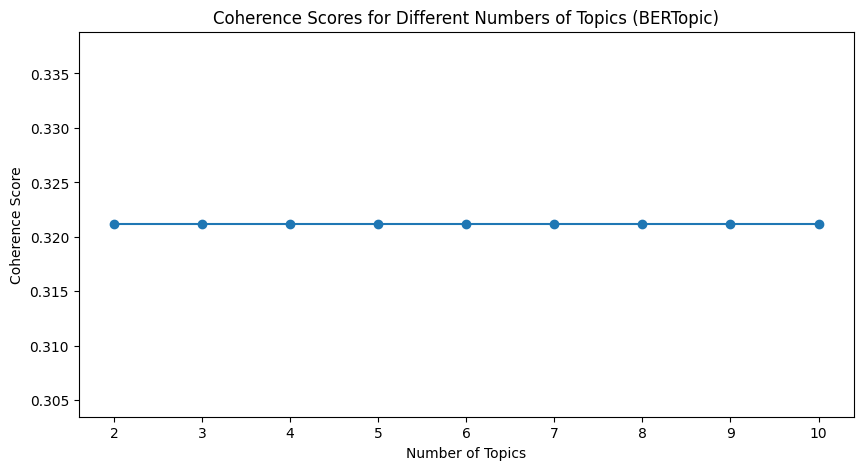


Optimal number of topics: 2


In [65]:
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics (BERTopic)")
plt.show()
optimal_k = topic_range[coherence_values.index(max(coherence_values))]
print(f"\nOptimal number of topics: {optimal_k}")
optimal_model = topic_model.reduce_topics([" ".join(doc) for doc in documents], nr_topics=optimal_k)


In [61]:
topics = optimal_model.get_topics()
print("\nSummary of Topics:")
for topic_num, words in topics.items():
    if topic_num != -1:
        topic_keywords = ", ".join([word for word, _ in words[:10]])
        print(f"Topic {topic_num}: {topic_keywords}")


Summary of Topics:
Topic 0: young, new, life, world, two, man, must, family, woman, one


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [45]:
pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.5 MB/s eta 0:00:00


In [46]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np


In [39]:
from google.colab import files
uploaded=files.upload()

Saving consumer_compliants.csv to consumer_compliants (1).csv


In [41]:
df = pd.read_csv('consumer_compliants.csv')
df = df.dropna()

In [49]:

valid_complaints = df['Consumer complaint narrative'].dropna()
n_samples = min(3000, valid_complaints.shape[0])
complaints = valid_complaints.sample(n=n_samples, random_state=42).tolist()


In [70]:
import pandas as pd
from bertopic import BERTopic

df = pd.read_csv('consumer_compliants.csv')
valid_complaints = df['Consumer complaint narrative'].dropna()

n_samples = min(3000, valid_complaints.shape[0])
complaints = valid_complaints.sample(n=n_samples, random_state=42).tolist()
complaints = [str(complaint) for complaint in complaints if isinstance(complaint, str)]  # Filter only strings
topic_model = BERTopic()
topics, probabilities = topic_model.fit_transform(complaints)
topic_info = topic_model.get_topic_info()
print("Topic Information:")
print(topic_info)
print("\nTopics Summary:")
for i in range(len(topic_info)):
    print(f"Topic {i}: {topic_model.get_topic(i)}")


Topic Information:
    Topic  Count                                    Name  \
0      -1    768                      -1_the_to_xxxx_and   
1       0   1027                      0_xxxx_debt_the_to   
2       1    122                 1_loan_loans_student_my   
3       2    108                     2_citi_the_and_card   
4       3     94                       3_car_xxxx_the_to   
5       4     80                      4_chase_the_to_and   
6       5     67             5_escrow_taxes_the_mortgage   
7       6     58                6_amex_card_you_american   
8       7     53                  7_capital_one_the_that   
9       8     44                  8_mortgage_we_the_xxxx   
10      9     41        9_payment_mortgage_xxxx_xxxxxxxx   
11     10     40                   10_late_payment_my_30   
12     11     39                  11_wells_fargo_the_and   
13     12     38        12_payment_balance_the_statement   
14     13     33              13_check_the_funds_account   
15     14     31     

In [67]:
print("\nVisualizing Topics...")
fig_topics = topic_model.visualize_topics()
fig_topics.show()


Visualizing Topics...


In [68]:
print("\nVisualizing Topic Frequency...")
fig_freq = topic_model.visualize_barchart(top_n_topics=10)
fig_freq.show()



Visualizing Topic Frequency...


In [69]:
print("\nVisualizing Topic Distribution...")
fig_dist = topic_model.visualize_distribution(probabilities)
fig_dist.show()



Visualizing Topic Distribution...


**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
'''yes this exercise helped in knowing the topic clearly and i face little difficulty in solving at starting overall this exercise is a great start for learning the topic.'''